In [94]:
import numpy as np
import librosa
from scipy import signal
import matplotlib.pyplot as plt
from IPython.display import Audio

# 设置中文字体
plt.rcParams["font.family"] = ["SimHei","Times New Roman"]  # 使用系统中存在的字体（可叠加）

In [95]:
duration = 2
freq = 200
sr = 44100
amp = 1
start_f = 220
end_f = 440
t = np.linspace(0,duration,int(sr * duration), endpoint=False)

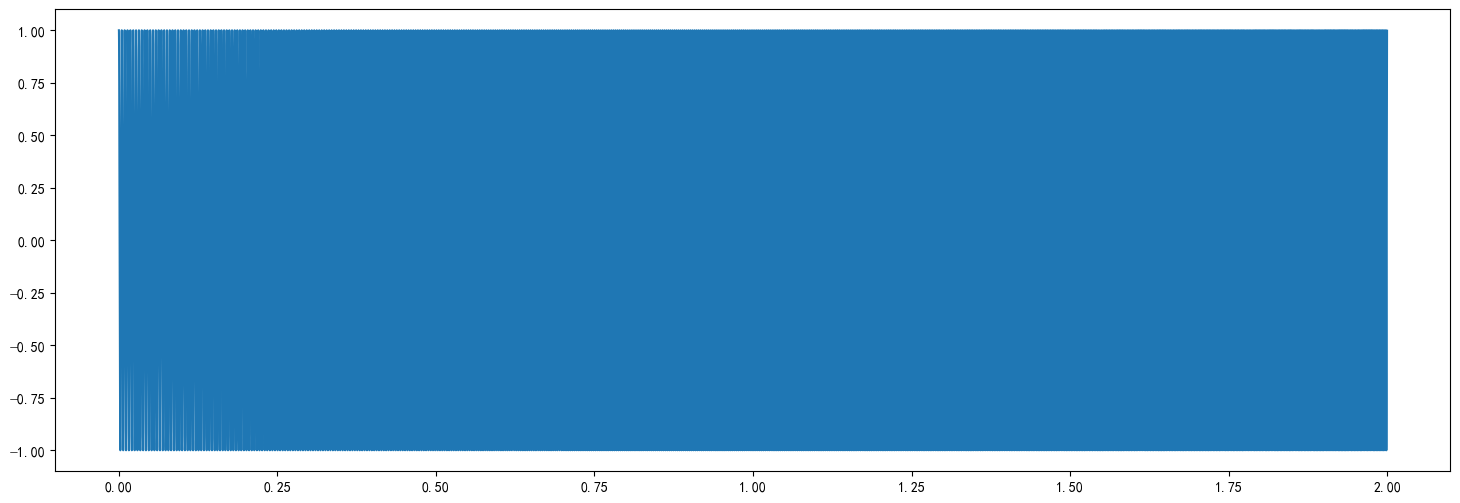

In [96]:
# 线性啁啾
cp_sg =  signal.chirp(t,start_f,duration,end_f,method='linear')  # 类型有线性，指数，双曲和二次型
plt.figure(figsize=(18, 6))
plt.plot(t,cp_sg)

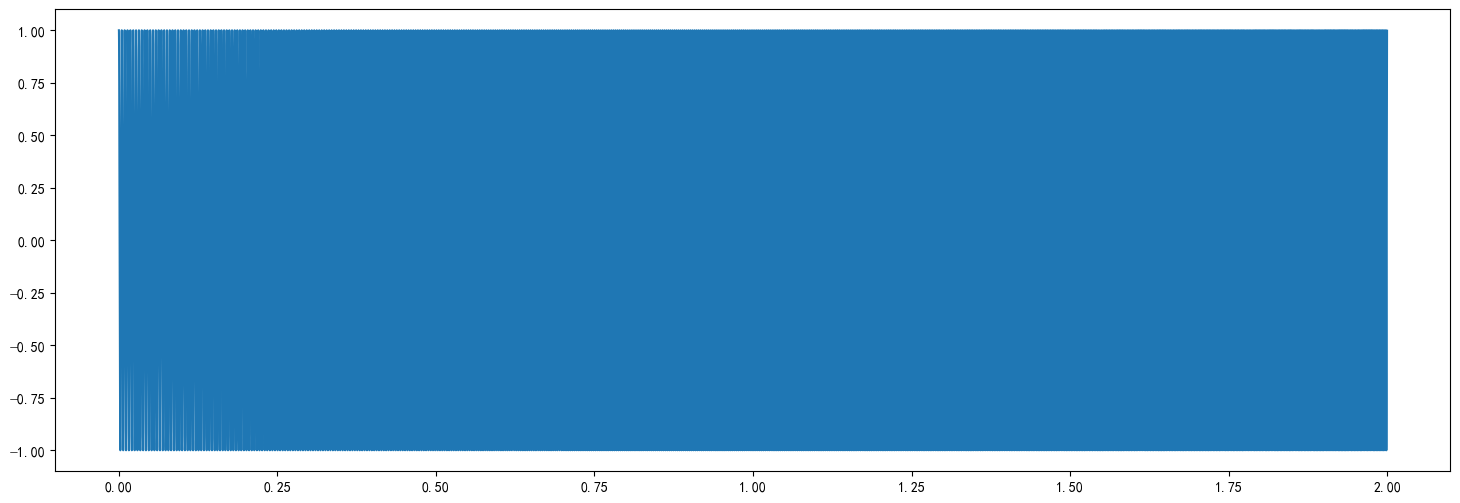

In [97]:
# 指数啁啾
cp_sg_log =  signal.chirp(t,start_f,duration,end_f,'logarithmic')
plt.figure(figsize=(18, 6))
plt.plot(t,cp_sg)

Audio(cp_sg,rate=sr)

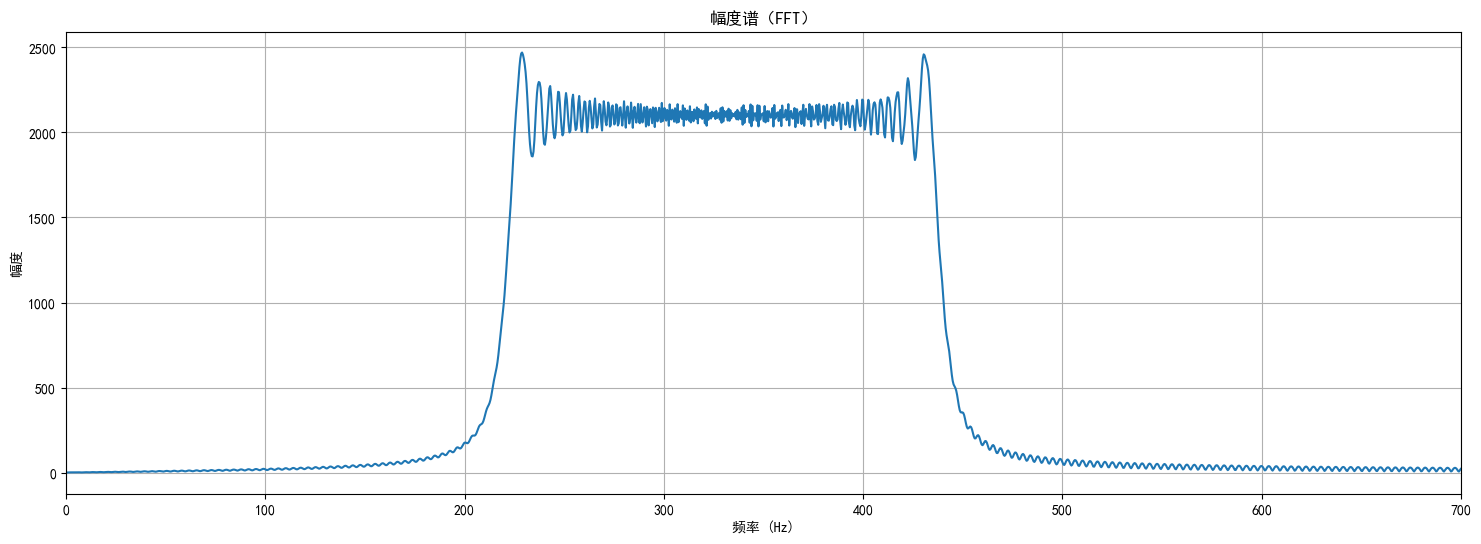

In [98]:
# 频谱
n_fft = 100000 # FFT窗口大小
tri_spec = np.fft.rfft(cp_sg, n=n_fft)  # 加直流偏离，对应频谱上f=0的值
amplitude = np.abs(tri_spec)  # 幅度谱
frequency = np.fft.rfftfreq(n_fft, d=1/sr)  # 频率轴

# 绘制幅度谱
plt.figure(figsize=(18, 6))
plt.plot(frequency, amplitude)
plt.title('幅度谱（FFT）')
plt.xlabel('频率 (Hz)')
plt.ylabel('幅度')
plt.grid(True)
plt.xlim(0, 700)
plt.show()

220Hz到440Hz的频谱几乎平坦，说明这些分量的能量持平，可以说明它是线性增加的，即各频率占时间相等

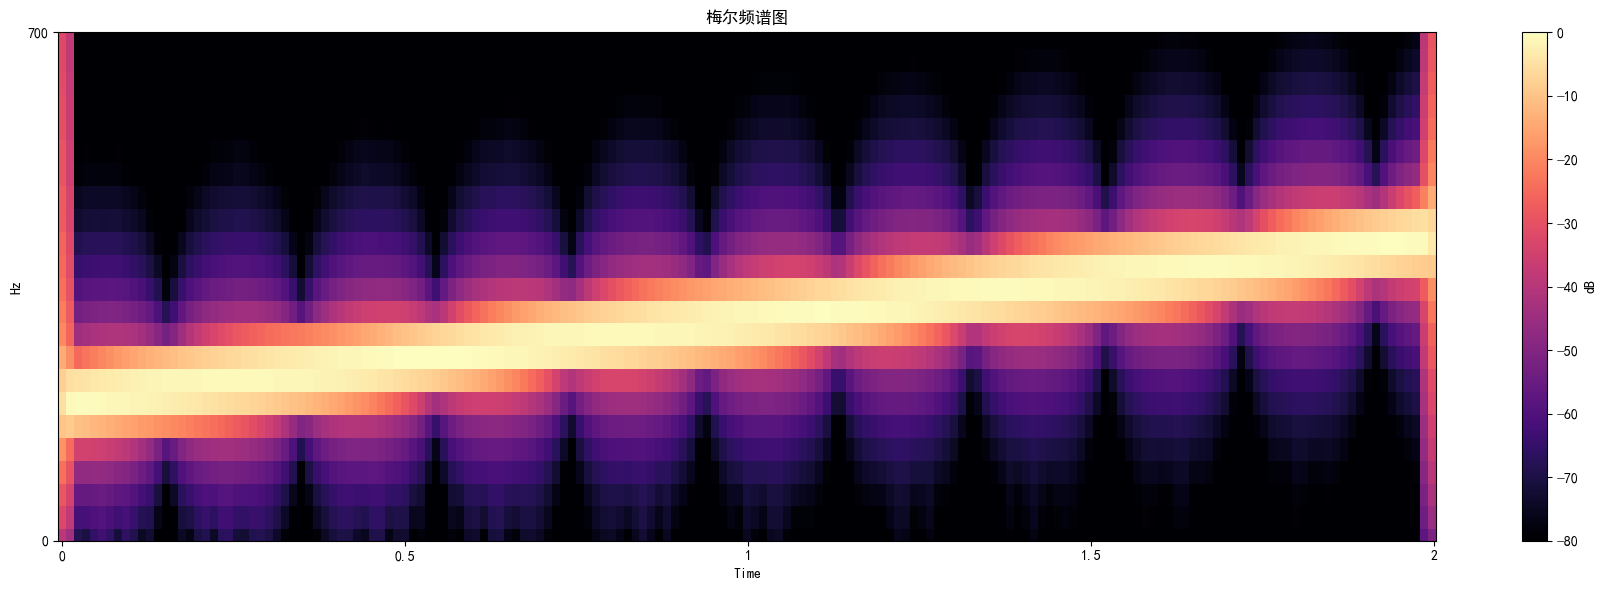

In [108]:
# 时频谱spectrogram
S = librosa.feature.melspectrogram(y=cp_sg,sr=sr)
# 转换为 dB 单位
S_dB = librosa.power_to_db(S, ref=np.max)

# 绘制梅尔频谱图
plt.figure(figsize=(18,6))
librosa.display.specshow(S_dB,sr=sr,x_axis='time',y_axis='mel')  # y 轴为梅尔频率
plt.colorbar(label='dB')

plt.ylim(0, 700)
plt.title('梅尔频谱图')
plt.tight_layout()
plt.show()

Gabor限制：时间分辨率与频率分辨率不可兼得；频率分辨率=sr/n，n为帧长

频谱泄露：当帧长为非周期整数倍时，由于每帧始末的不连续性，会导致创造出非信号频率的频率分量，最终在频谱上体现为，以信号频率为中心向两边的频谱泄露，即其余本不属于原信号的频率分量。出现此情况时，往往需要对时域帧应用窗函数来解决。